### Hill Slope dose response curve with 3 bounded parameters

In [ ]:
HS_BOUNDS = ([0, 0, 0], [1, 12, 4])

def response_curve(x, einf, ec50, hs):
    """ ec50 in -log10(M)
    """
    return einf + (1 - einf) / (1 + 10 ** ((ec50 - x) * hs))

All our dose values are in -log10(M). This is different from PharmacoDB's unit (µM). For example, the bounds for EC50 is [1pM, 1M], or [10<sup>-6</sup>µM, 10<sup>+6</sup>µM], is expressed as [0, 12] in our notation. 


### Parameters and metrics

* Einf - fraction of cells not susceptible to drug
* EC50 - drug dose to have half target receptors bound
* HS - hill slope binding cooperativity

* AUC - area under growth curve for a fixed dose range: [4, 10]
* IC50 - drug dose to have 50% growth
* EC50se - standard error of the estimated EC50
* R2fit - R<sup>2</sup> score between the unclipped, real growths and fitted growth values

* AUC1 - area under growth curve for the measured dose range in a study
* AAC1 - area above growth curve for the measured dose range in a study
* DDS1 - drug sensitivity score defined in [Yadav et al, 2014](https://www.nature.com/articles/srep05193)

The first three are model parameters estimated through curve fitting. The remaining are derived metrics. 

HS is a parameter describing the cooperativity of binding. HS < 1 denotes negative binding cooperativity, HS = 1 denotes noncooperative binding, and HS > 1 denotes positive binding cooperativity.

AAC1 can be compared with PharmacoDB's AAC.

DSS1 can be compared with PharmacoDB's DDS1. 

The difference between AUC and AUC1 is that AUC is based on a fixed dose range while AUC1 is calculated for the measured dose window in a particular study. AUC can be viewed as the average growth and can be compared across studies. AUC1 measures the shape of the curve and is dependent on the study choice of measured dose range. 

DSS1 is a more robust variant of AUC1 normalized against dose range. DSS1 measures the response sensitivity within the intended dose range of the drug.

The figure below shows the original definition of DSS1. We adopt PharmacoDB's simplified version, which does not have the control curve. Note the y-axis is flipped (growth vs inhibition) in our examples below.  

![DSS1](https://github.com/levinas/curve/raw/master/figs/DSS1.png)

### A PharmacoDB example
Let's take a look at [a multi-study dose response example from PharmacoDB](https://pharmacodb.pmgenomics.ca/search?q=LOXIMVI+paclitaxel) and see if we can reproduce the curve fitting parameters.

![Dose response curves](https://github.com/levinas/curve/raw/master/figs/pharmacoDB-curves.png)

![Summary stats](https://github.com/levinas/curve/raw/master/figs/pharmacoDB-stats.png)

For this cell-drug combination, there are two CTRP replicate studies, both of which are poorly fitted. The second CTRP study is grayed out to reduce confusion.  

#### Case 1

We fit the purple gCSI curve below. The parameters match PharmacoDB's table after adjusting for the concentration unit difference.

        SOURCE          CELL     DRUG      DOSE  GROWTH   STUDY
6293838   gCSI  gCSI.LOXIMVI  gCSI.13  9.339134  0.9977  241830
6293839   gCSI  gCSI.LOXIMVI  gCSI.13  8.861697  0.9496  241830
6293840   gCSI  gCSI.LOXIMVI  gCSI.13  8.384576  0.9149  241830
6293841   gCSI  gCSI.LOXIMVI  gCSI.13  7.907455  0.6179  241830
6293842   gCSI  gCSI.LOXIMVI  gCSI.13  7.430334  0.2779  241830
6293843   gCSI  gCSI.LOXIMVI  gCSI.13  6.953212  0.2125  241830
6293844   gCSI  gCSI.LOXIMVI  gCSI.13  6.477122  0.1462  241830
6293845   gCSI  gCSI.LOXIMVI  gCSI.13  6.000000  0.1539  241830
6293846   gCSI  gCSI.LOXIMVI  gCSI.13  5.522879  0.1531  241830


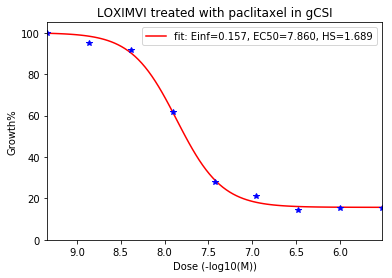

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.4575,7.7636,7.8603,0.0238,0.9977,0.1568,1.6888,0.5163,0.4837,0.4828


In [1087]:
fit_response(df0, 'LOXIMVI', 'paclitaxel', 'gCSI')

We look at two confidence parameters to assess the quality of the fit:
1. EC50 standard error = 0.0238 lg(M)
2. R<sup>2</sup> of fit = 0.9977

Both look good.

The purple dotted line in the PharmacoDB figure marks the gCSI EC50 value (0.0138 µM), which translates to 7.86 in our EC50 estimate in -lg(M).

In [1048]:
-np.log10(0.0138 * 10**-6)

7.860120913598763

#### Case 2
The GDSC curve below has an estimated E<sub>∞</sub> of 0.5137. This means the lowest the response curve can ever get is 51.37% growth, which explains the NaN estimate for the IC50. It's a good fit nonetheless given the high R2fit and low EC50se. 

        SOURCE          CELL     DRUG     DOSE  GROWTH  STUDY
7228896   GDSC  GDSC.LOXIMVI  GDSC.11  9.39794  1.0028  91048
7228897   GDSC  GDSC.LOXIMVI  GDSC.11  9.09691  0.9844  91048
7228898   GDSC  GDSC.LOXIMVI  GDSC.11  8.79588  0.8927  91048
7228899   GDSC  GDSC.LOXIMVI  GDSC.11  8.49485  0.7785  91048
7228900   GDSC  GDSC.LOXIMVI  GDSC.11  8.19382  0.7385  91048
7228901   GDSC  GDSC.LOXIMVI  GDSC.11  7.89279  0.6349  91048
7228902   GDSC  GDSC.LOXIMVI  GDSC.11  7.59176  0.5914  91048
7228903   GDSC  GDSC.LOXIMVI  GDSC.11  7.29073  0.5343  91048
7228904   GDSC  GDSC.LOXIMVI  GDSC.11  6.98970  0.5171  91048


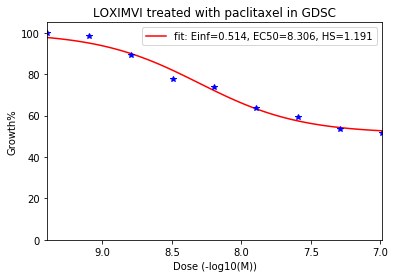

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.6513,NaN,8.3055,0.0722,0.9845,0.5137,1.1909,0.2641,0.7359,0.1952


In [1086]:
fit_response(df0, 'LOXIMVI', 'paclitaxel', 'GDSC')

#### Case 3
The response data of the first CTRP study is a pathological case. The fitted curve is nearly a straight line. The estimated EC50 value is close to the upper bound (12) with extremely high standard error. Other parameters still match PharmacoDB's table closely. 

        SOURCE          CELL      DRUG      DOSE  GROWTH   STUDY
3137911   CTRP  CTRP.LOXIMVI  CTRP.410  8.698970  0.4034  430774
3137912   CTRP  CTRP.LOXIMVI  CTRP.410  8.387217  0.4963  430774
3137913   CTRP  CTRP.LOXIMVI  CTRP.410  8.091515  0.3536  430774
3137914   CTRP  CTRP.LOXIMVI  CTRP.410  7.795880  0.3044  430774
3137915   CTRP  CTRP.LOXIMVI  CTRP.410  7.494850  0.2894  430774
3137916   CTRP  CTRP.LOXIMVI  CTRP.410  7.187087  0.3679  430774
3137917   CTRP  CTRP.LOXIMVI  CTRP.410  6.886056  0.2768  430774
3137918   CTRP  CTRP.LOXIMVI  CTRP.410  6.585027  0.3187  430774
3137919   CTRP  CTRP.LOXIMVI  CTRP.410  6.283997  0.3300  430774
3137920   CTRP  CTRP.LOXIMVI  CTRP.410  6.000000  0.2679  430774
3137921   CTRP  CTRP.LOXIMVI  CTRP.410  5.677781  0.3026  430774
3137922   CTRP  CTRP.LOXIMVI  CTRP.410  5.376751  0.3258  430774
3137923   CTRP  CTRP.LOXIMVI  CTRP.410  5.080922  1.0410  430774
3137924   CTRP  CTRP.LOXIMVI  CTRP.410  4.769551  1.1900  430774
3137925   CTRP  CTRP.LOXI

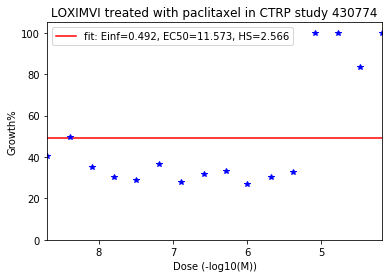

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.4919,10.8756,11.573,1.361470e+08,-0.0043,0.4919,2.5665,0.5081,0.4919,0.4535


In [1085]:
fit_response(df0, 'LOXIMVI', 'paclitaxel', 'CTRP', study=0)

#### Case 4
PharmacoDB does not have NCI60 data. Our combined single drug response data include 52 studies for this cell-drug tuple, one of which is shown below.

         SOURCE            CELL        DRUG  DOSE  GROWTH     STUDY
10533438  NCI60  NCI60.LOX-IMVI  NSC.125973   6.0  0.5980  9306SA72
10533439  NCI60  NCI60.LOX-IMVI  NSC.125973   8.0  0.6000  9306SA72
10533440  NCI60  NCI60.LOX-IMVI  NSC.125973   9.0  0.7040  9306SA72
10533441  NCI60  NCI60.LOX-IMVI  NSC.125973   7.0  0.5865  9306SA72
10533442  NCI60  NCI60.LOX-IMVI  NSC.125973  10.0  0.7555  9306SA72


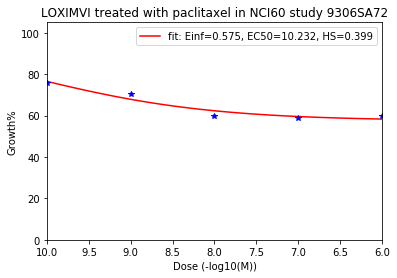

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.62,NaN,10.2318,0.3201,0.9322,0.5746,0.3988,0.3592,0.6408,0.288


In [1121]:
fit_response(df0, 'LOXIMVI', 'paclitaxel', 'NCI60', study=2)

While R<sup>2</sup> is above 0.9, the standard error of EC50, at one third log, is not ideal.

### Examples of problematic curves

      SOURCE       CELL     DRUG      DOSE  GROWTH     STUDY
69608   CCLE  CCLE.A172  CCLE.19  8.602060  0.9370  fake_exp
69609   CCLE  CCLE.A172  CCLE.19  8.096910  0.9930  fake_exp
69610   CCLE  CCLE.A172  CCLE.19  7.602060  0.9946  fake_exp
69611   CCLE  CCLE.A172  CCLE.19  7.096910  0.9870  fake_exp
69612   CCLE  CCLE.A172  CCLE.19  6.602060  0.8800  fake_exp
69613   CCLE  CCLE.A172  CCLE.19  6.096910  0.9190  fake_exp
69614   CCLE  CCLE.A172  CCLE.19  5.596879  0.9240  fake_exp
69615   CCLE  CCLE.A172  CCLE.19  5.096910  0.8400  fake_exp


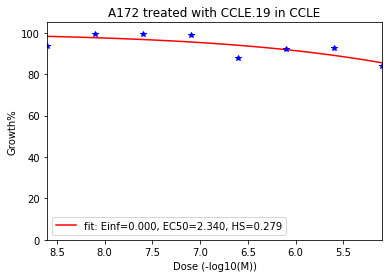

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.9253,2.3398,2.3398,37.2213,0.5916,0.0,0.2792,0.0618,0.9382,0.0045


In [1122]:
fit_response(df0, 'A172', 'CCLE.19', 'CCLE')

      SOURCE         CELL    DRUG      DOSE  GROWTH     STUDY
19471   CCLE  CCLE.42MGBA  CCLE.6  8.602060  1.0344  fake_exp
19472   CCLE  CCLE.42MGBA  CCLE.6  8.096910  0.7700  fake_exp
19473   CCLE  CCLE.42MGBA  CCLE.6  7.602060  0.9710  fake_exp
19474   CCLE  CCLE.42MGBA  CCLE.6  7.096910  0.6200  fake_exp
19475   CCLE  CCLE.42MGBA  CCLE.6  6.602060  1.1930  fake_exp
19476   CCLE  CCLE.42MGBA  CCLE.6  6.096910  1.0175  fake_exp
19477   CCLE  CCLE.42MGBA  CCLE.6  5.596879  1.2360  fake_exp
19478   CCLE  CCLE.42MGBA  CCLE.6  5.096910  0.8800  fake_exp


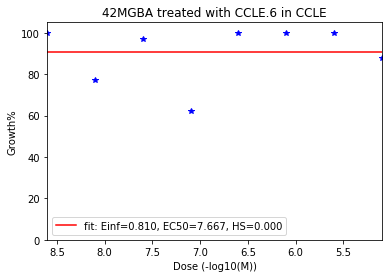

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.9062,NaN,7.6674,0.0,-0.0972,0.8103,0.0,0.0949,0.9051,0.0


In [1124]:
fit_response(df0, '42MGBA', 'CCLE.6', 'CCLE')

      SOURCE       CELL     DRUG      DOSE  GROWTH     STUDY
54244   CCLE  CCLE.BT20  CCLE.15  8.602060  0.7400  fake_exp
54245   CCLE  CCLE.BT20  CCLE.15  8.096910  0.9410  fake_exp
54246   CCLE  CCLE.BT20  CCLE.15  7.602060  0.9140  fake_exp
54247   CCLE  CCLE.BT20  CCLE.15  7.096910  1.0502  fake_exp
54248   CCLE  CCLE.BT20  CCLE.15  6.602060  1.0019  fake_exp
54249   CCLE  CCLE.BT20  CCLE.15  6.096910  0.8300  fake_exp
54250   CCLE  CCLE.BT20  CCLE.15  5.596879  0.8600  fake_exp
54251   CCLE  CCLE.BT20  CCLE.15  5.096910  0.7800  fake_exp


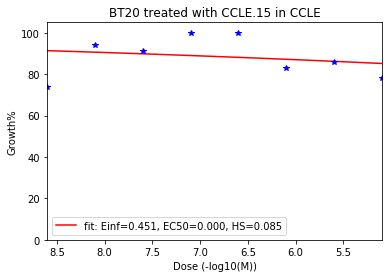

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.8851,-11.877,0.0,641.2046,0.0216,0.4505,0.0846,0.1156,0.8844,0.0192


In [1125]:
fit_response(df0, 'BT20', 'CCLE.15', 'CCLE')

IC50 = -11.877 stands for a half inhibitory concentration of **7.5e+11** M.

       SOURCE             CELL      DRUG      DOSE  GROWTH   STUDY
304845   CTRP  CTRP.ACC-MESO-1  CTRP.125  8.698970  1.1360  264411
304846   CTRP  CTRP.ACC-MESO-1  CTRP.125  8.387217  1.1290  264411
304847   CTRP  CTRP.ACC-MESO-1  CTRP.125  8.091515  1.1070  264411
304848   CTRP  CTRP.ACC-MESO-1  CTRP.125  7.795880  1.1280  264411
304849   CTRP  CTRP.ACC-MESO-1  CTRP.125  7.494850  1.1450  264411
304850   CTRP  CTRP.ACC-MESO-1  CTRP.125  7.187087  1.1030  264411
304851   CTRP  CTRP.ACC-MESO-1  CTRP.125  6.886056  1.1280  264411
304852   CTRP  CTRP.ACC-MESO-1  CTRP.125  6.585027  1.1130  264411
304853   CTRP  CTRP.ACC-MESO-1  CTRP.125  6.283997  0.9841  264411
304854   CTRP  CTRP.ACC-MESO-1  CTRP.125  6.000000  1.0230  264411
304855   CTRP  CTRP.ACC-MESO-1  CTRP.125  5.677781  1.1370  264411
304856   CTRP  CTRP.ACC-MESO-1  CTRP.125  5.376751  1.1220  264411
304857   CTRP  CTRP.ACC-MESO-1  CTRP.125  5.080922  1.0100  264411
304858   CTRP  CTRP.ACC-MESO-1  CTRP.125  4.769551  1.0520  26

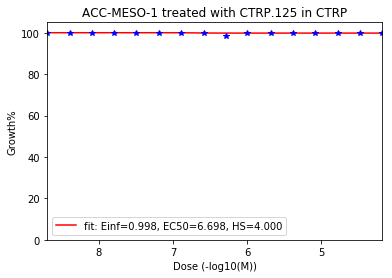

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.9992,NaN,6.6978,1.11,-3.8351,0.9982,3.9997,0.001,0.999,0.0


In [1140]:
fit_response(df0, 'ACC-MESO-1', 'CTRP.125', 'CTRP')

EC50se == 0 alone is not a guarantee of a good fit. When any of the three parameters is close to a bound (HS ~= 4 above, HS == 0 below), the low standard error on EC50 is misleading. In both cases, R2 is negative. 

      SOURCE         CELL     DRUG      DOSE  GROWTH     STUDY
53989   CCLE  CCLE.1321N1  CCLE.15  8.602060  0.7300  fake_exp
53990   CCLE  CCLE.1321N1  CCLE.15  8.096910  0.8400  fake_exp
53991   CCLE  CCLE.1321N1  CCLE.15  7.602060  0.9370  fake_exp
53992   CCLE  CCLE.1321N1  CCLE.15  7.096910  1.0086  fake_exp
53993   CCLE  CCLE.1321N1  CCLE.15  6.602060  0.9590  fake_exp
53994   CCLE  CCLE.1321N1  CCLE.15  6.096910  0.9650  fake_exp
53995   CCLE  CCLE.1321N1  CCLE.15  5.596879  1.0121  fake_exp
53996   CCLE  CCLE.1321N1  CCLE.15  5.096910  0.9120  fake_exp


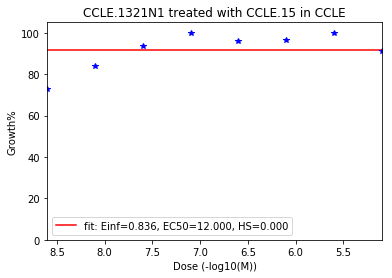

,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
metrics,0.9167,NaN,12.0,0.0,-0.0009,0.8358,0.0,0.0821,0.9179,0.0


In [1141]:
fit_response(df0, 'CCLE.1321N1', 'CCLE.15', 'CCLE')